In [20]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))

['ner.csv', 'ner_dataset.csv']


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [22]:
data = pd.read_csv("../input/ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.tail(10)

,Sentence #,Word,POS,Tag
1048565,Sentence: 47958,impact,NN,O
1048566,Sentence: 47958,.,.,O
1048567,Sentence: 47959,Indian,JJ,B-gpe
1048568,Sentence: 47959,forces,NNS,O
1048569,Sentence: 47959,said,VBD,O
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O
1048574,Sentence: 47959,attack,NN,O


## Extracting the list of words in the Data

In [23]:
words = list(set(data['Word'].values))
words.append("ENDPAD")
print(words[-10:])
n_words = len(words)
n_words

['6,000-meter', 'popes', 'Azizi', '8-billion', 'District', 'final', 'auctioned', 'Truth', 'whiten', 'ENDPAD']


35179

## Extracting the unique tags in the Data.

In [24]:
tags = list(set(data['Tag'].values))
print(tags)
n_tags = len(tags)
n_tags

['O', 'B-tim', 'I-gpe', 'B-per', 'I-org', 'B-nat', 'I-nat', 'I-art', 'B-org', 'B-eve', 'B-geo', 'B-gpe', 'I-geo', 'I-tim', 'I-eve', 'I-per', 'B-art']


17

## Method to format above dataset int (word, POS, tag) tuple format for every sentence.

In [114]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [115]:
getter = SentenceGetter(data)

In [116]:
sent = getter.get_next()
sent

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [28]:
sentences = getter.sentences

In [120]:
sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

## Maximum length of every sentence is 50. Truncate it, if it is big, PAD it, if it is small.

In [30]:
max_len = 50
tag2idx = {t: i for i, t in enumerate(tags)}

In [31]:
tag2idx

{'O': 0,
 'B-tim': 1,
 'I-gpe': 2,
 'B-per': 3,
 'I-org': 4,
 'B-nat': 5,
 'I-nat': 6,
 'I-art': 7,
 'B-org': 8,
 'B-eve': 9,
 'B-geo': 10,
 'B-gpe': 11,
 'I-geo': 12,
 'I-tim': 13,
 'I-eve': 14,
 'I-per': 15,
 'B-art': 16}

In [117]:
X = [[w[0] for w in s] for s in sentences ]

In [119]:
X[1]

['Iranian',
 'officials',
 'say',
 'they',
 'expect',
 'to',
 'get',
 'access',
 'to',
 'sealed',
 'sensitive',
 'parts',
 'of',
 'the',
 'plant',
 'Wednesday',
 ',',
 'after',
 'an',
 'IAEA',
 'surveillance',
 'system',
 'begins',
 'functioning',
 '.']

## Padding the sentence with "_ _PAD_ _" word.

In [37]:
new_X = []

for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("__PAD__")
    new_X.append(new_seq)

X = new_X

In [110]:
X[1]

['Iranian',
 'officials',
 'say',
 'they',
 'expect',
 'to',
 'get',
 'access',
 'to',
 'sealed',
 'sensitive',
 'parts',
 'of',
 'the',
 'plant',
 'Wednesday',
 ',',
 'after',
 'an',
 'IAEA',
 'surveillance',
 'system',
 'begins',
 'functioning',
 '.',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__',
 '__PAD__']

In [42]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]
y[1]

[11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 8, 0, 0, 0, 0, 0]

## Padding the tags with padded sentence with "O" tag.

In [44]:
from keras.preprocessing.sequence import pad_sequences
y = pad_sequences(maxlen=max_len, padding='post', sequences=y, value=tag2idx["O"])

In [45]:
y[1]

array([11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

## Splitting the data into train and test, training on 90% and testing on 10%.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2018)

In [49]:
batch_size = 32

In [50]:
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K

In [51]:
sess = tf.Session()
K.set_session(sess)

In [52]:
elmo_model = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [58]:
def ElmoEmbedding(x):
    return elmo_model(inputs={"tokens": tf.squeeze(tf.cast(x, tf.string)),"sequence_len": tf.constant(batch_size*[max_len])},
                      signature="tokens", as_dict=True)["elmo"]

In [59]:
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

In [61]:
input_text = Input(shape=(max_len,), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(max_len, 1024))(input_text)
x = Bidirectional(LSTM(units=512, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))(embedding)
x_rnn = Bidirectional(LSTM(units=512, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))(x)
x = add([x, x_rnn])
out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)

In [62]:
model = Model(input_text, out)

In [63]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [65]:
X_train, X_val = X_train[:1213*batch_size], X_train[-135*batch_size:]
y_train, y_val = y_train[:1213*batch_size], y_train[-135*batch_size:]
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

In [68]:
history = model.fit(np.array(X_train), y_train, validation_data=(np.array(X_val), y_val), batch_size=batch_size, epochs=1, verbose=1)

Train on 38816 samples, validate on 4320 samples
Epoch 1/1
38816/38816 [==============================] - 1498s 39ms/step - loss: 0.0401 - acc: 0.9870 - val_loss: 0.0425 - val_acc: 0.9867


In [69]:
hist = pd.DataFrame(history.history)

In [144]:
i = 19
p = model.predict(np.array(X_test[i:i+batch_size]))[0]
print(p.shape)
p = np.argmax(p, axis=-1)
print(p.shape)
print(p)
print(y_test[i])
print("{:15} {:5}: {}".format("Word", "Pred", "True"))
print("="*30)
for w, true, pred in zip(X_test[i], y_test[i], p):
    if w != "__PAD__":
        print("{:15}:{:5} {}".format(w, tags[pred], tags[true]))

(50, 17)
(50,)
[ 0  0  0 10  0 10  0  0  0  8  4  0  0  0  0  0  0  0  0  0  0  3 15 15
 15  0  0  0  0  0  0  0  0  0  0  1 13  0  0  0  0  0  0  0  0  0  0  0
  0  0]
[ 0  0  0 10  0 10  0  0  0  8  4  0  0  0  0  0  0  0  0  0  0  3  0  3
 15  0  0  0  0  0  0  0  0  0  0  1 13  0  0  0  0  0  0  0  0  0  0  0
  0  0]
Word            Pred : True
Meanwhile      :O     O
,              :O     O
in             :O     O
Belgrade       :B-geo B-geo
,              :O     O
Serbia         :B-geo B-geo
's             :O     O
extreme        :O     O
nationalist    :O     O
Radical        :B-org B-org
Party          :I-org I-org
has            :O     O
filed          :O     O
a              :O     O
motion         :O     O
of             :O     O
no-confidence  :O     O
in             :O     O
the            :O     O
government     :O     O
of             :O     O
Prime          :B-per B-per
Minister       :I-per O
Vojislav       :I-per B-per
Kostunica      :I-per I-per
to             :O    

In [150]:
prediction = model.predict(np.array(X_test[:4768]),batch_size=batch_size, verbose=1)

4768/4768 [==============================] - 121s 25ms/step


In [152]:
# prediction = np.argmax(prediction, axis=-1)
print(prediction.shape)

(4768, 50)


## Confusion Matrix and Accuracy

[[46  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  1]]


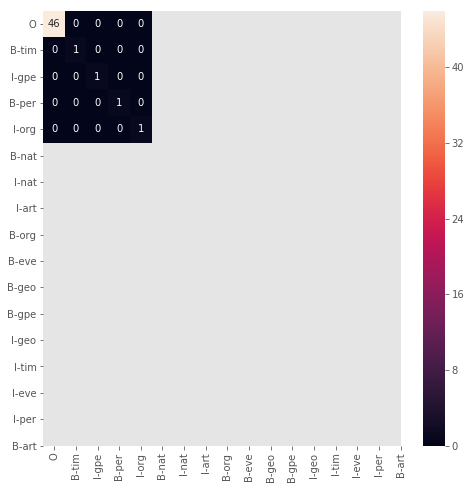

In [158]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Build a confusion matrix for 1st sentence.
# Sample confusion Matrix for one sentence
print(confusion_matrix(y_test[0], prediction[0]))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test[0], prediction[0]), annot=True, fmt='g', xticklabels=tags, yticklabels=tags)

In [159]:
print(y_test[:2])
print("="*30)
print(prediction[:2])

[[ 0  0  0  0  0  0  0  0  0  0  8  0  3 15  0  0  0  0  0 10  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]
[[ 0  0  0  0  0  0  0  0  0  0  8  0  3 15  0  0  0  0  0 10  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]


In [160]:
# Flatten out the list of list sentences into a single list for creating confusion_matrix
from itertools import chain
# print(list(chain.from_iterable(y_test[:2])))
y_test_flatten = list(chain.from_iterable(y_test[:4768]))
prediction_flatten = list(chain.from_iterable(prediction))
print(len(y_test_flatten), len(prediction_flatten))

238400 238400


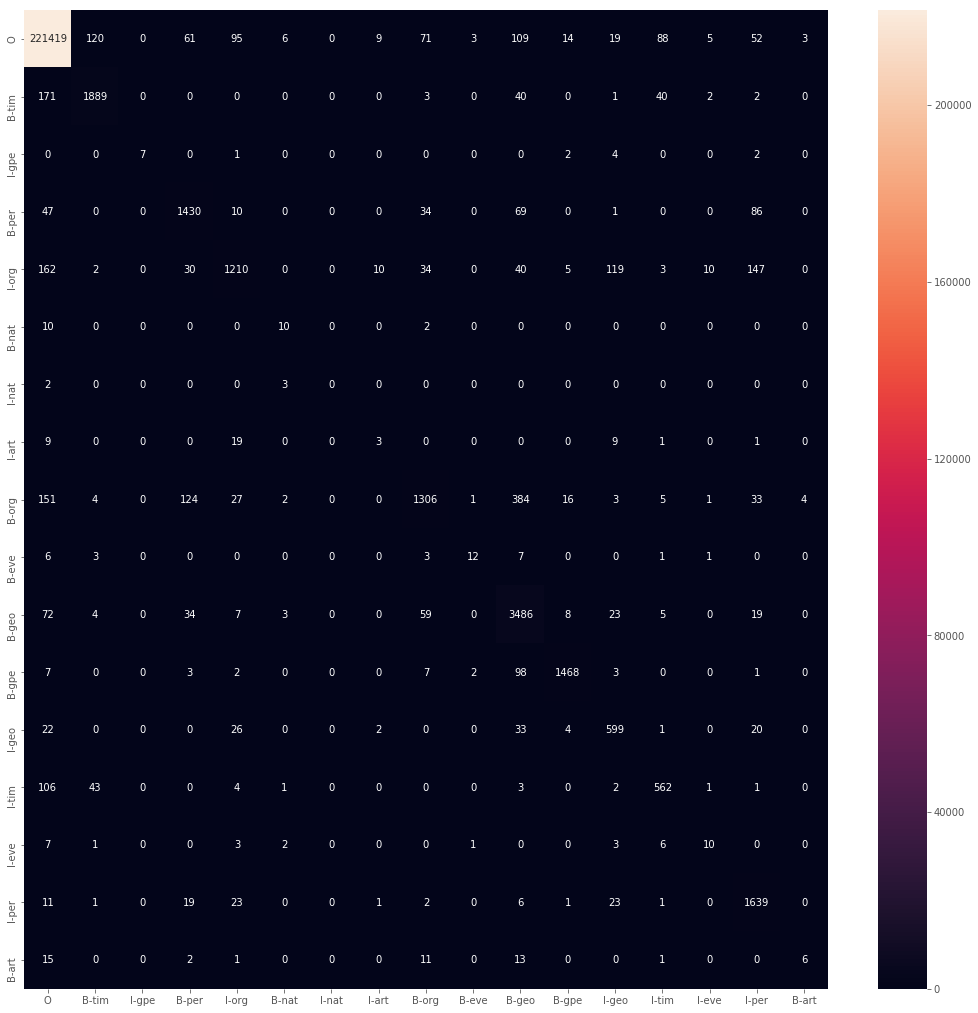

In [161]:
conf_mat = confusion_matrix(y_test_flatten, prediction_flatten)
plt.figure(figsize=(18,18))
sns.heatmap(conf_mat, annot=True, fmt='g', xticklabels=tags, yticklabels=tags)

In [143]:
accuracy_score(y_test_flatten, prediction_flatten)

0.9859731543624161